

## Title : “Analyzing Gasoline Price Trends: A Predictive Approach”

![gas](gas.jpg)


By Christian Minchala, Kevin Heneson , and Hao Ye


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
import copy
import plotly.express as px
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import csv
import sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
#import shap

- https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021

- https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_nus_w.htm

No need to data clean because the data is already clean

The data contains the following information:

- A1: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
- A2: Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
- A3: Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
- R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
- R2: Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
- R3: Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
- M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
- M2: Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
- M3: Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
- P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)
- P2: Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
- P3: Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon) 
- D1: Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)
- "Source: U.S. Energy Information Administration (Aug 2024)."

In [5]:
All_grade = pd.read_csv("Weekly_U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv",parse_dates=['Date']) #A1
Midgrade = pd.read_csv('Weekly_U.S._Midgrade_All_Formulations_Retail_Gasoline_Prices.csv',parse_dates=['Date'])# M1
Premium_grade = pd.read_csv('Weekly_U.S._Premium_All_Formulations_Retail_Gasoline_Prices.csv',parse_dates=['Date'])# P1
Regular = pd.read_csv('Weekly_U.S._Regular_All_Formulations_Retail_Gasoline_Prices.csv',parse_dates=['Date'])# R1
Diesel = pd.read_csv('Weekly_U.S._No_2_Diesel_Retail_Prices.csv',parse_dates=['Date']) # D1

In [6]:
gasOld = pd.read_csv('gas.csv',parse_dates=['Date'])
gasOld

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [7]:
All_grade = All_grade.sort_values(by = 'Date')
All_grade_subset = All_grade[All_grade['Date'] >= '1994-11-28']

All_grade_subset

,Date,A1
1558,1994-11-28,1.117
1557,1994-12-05,1.127
1556,1994-12-12,1.131
1555,1994-12-19,1.134
1554,1994-12-26,1.125
...,...,...
4,2024-09-09,3.360
3,2024-09-16,3.307
2,2024-09-23,3.311
1,2024-09-30,3.303


In [8]:
Midgrade = Midgrade.sort_values(by='Date')

Midgrade

,Date,M1
1558,1994-11-28,1.197
1557,1994-12-05,1.197
1556,1994-12-12,1.188
1555,1994-12-19,1.179
1554,1994-12-26,1.171
...,...,...
4,2024-09-09,3.791
3,2024-09-16,3.755
2,2024-09-23,3.751
1,2024-09-30,3.738


In [9]:
Regular = Regular.sort_values(by='Date')

Regular_subset = Regular[Regular['Date'] >='1994-11-28']
Regular_subset

Regular_subset

,Date,R1
1558,1994-11-28,1.105
1557,1994-12-05,1.103
1556,1994-12-12,1.095
1555,1994-12-19,1.087
1554,1994-12-26,1.077
...,...,...
4,2024-09-09,3.236
3,2024-09-16,3.180
2,2024-09-23,3.185
1,2024-09-30,3.179


In [10]:
Premium_grade = Premium_grade.sort_values(by='Date')

Premium_grade_subset = Premium_grade[Premium_grade['Date'] >='1994-11-28']
Premium_grade_subset

,Date,P1
1558,1994-11-28,1.303
1557,1994-12-05,1.301
1556,1994-12-12,1.288
1555,1994-12-19,1.279
1554,1994-12-26,1.270
...,...,...
4,2024-09-09,4.153
3,2024-09-16,4.119
2,2024-09-23,4.108
1,2024-09-30,4.094


In [11]:
Diesel = Diesel.sort_values(by='Date')

Diesel_subset = Diesel[Diesel['Date'] >='1994-11-28']
Diesel_subset

,Date,D1
1558,1994-11-28,1.126
1557,1994-12-05,1.123
1556,1994-12-12,1.114
1555,1994-12-19,1.109
1554,1994-12-26,1.106
...,...,...
4,2024-09-09,3.555
3,2024-09-16,3.526
2,2024-09-23,3.539
1,2024-09-30,3.544


In [12]:
# Merging the dataframes on the 'Date' column
gas = All_grade_subset.merge(Midgrade, on='Date', how='inner') \
                            .merge(Regular_subset, on='Date', how='inner') \
                            .merge(Diesel_subset, on='Date', how='inner') \
                            .merge(Premium_grade_subset, on='Date', how='inner')

gas

,Date,A1,M1,R1,D1,P1
0,1994-11-28,1.117,1.197,1.105,1.126,1.303
1,1994-12-05,1.127,1.197,1.103,1.123,1.301
2,1994-12-12,1.131,1.188,1.095,1.114,1.288
3,1994-12-19,1.134,1.179,1.087,1.109,1.279
4,1994-12-26,1.125,1.171,1.077,1.106,1.270
...,...,...,...,...,...,...
1554,2024-09-09,3.360,3.791,3.236,3.555,4.153
1555,2024-09-16,3.307,3.755,3.180,3.526,4.119
1556,2024-09-23,3.311,3.751,3.185,3.539,4.108
1557,2024-09-30,3.303,3.738,3.179,3.544,4.094


<Axes: >

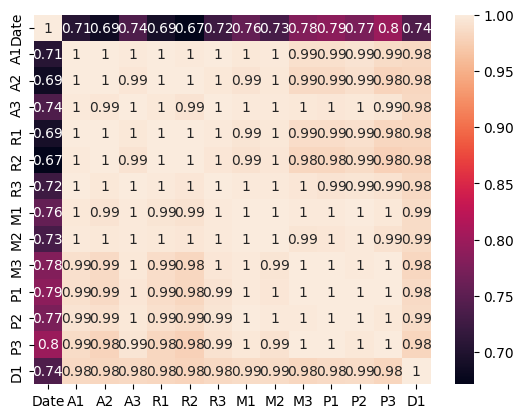

In [13]:
sns.heatmap(gasOld.corr(),annot=True)

<Axes: >

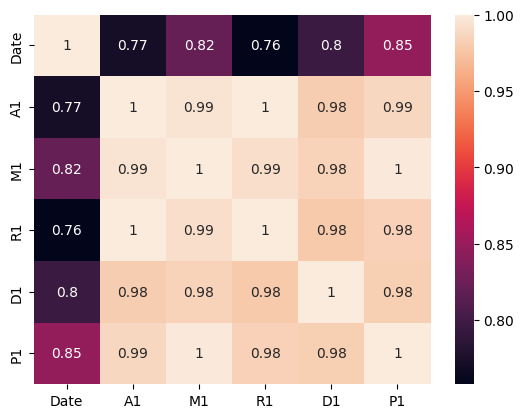

In [14]:
sns.heatmap(gas.corr(), annot = True)

In [15]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X = gas.iloc[:,0:1]
Y = gas.iloc[:,1:2] # A1 

print(X.shape,Y.shape)

(1559, 1) (1559, 1)


In [16]:
X

,Date
0,1994-11-28
1,1994-12-05
2,1994-12-12
3,1994-12-19
4,1994-12-26
...,...
1554,2024-09-09
1555,2024-09-16
1556,2024-09-23
1557,2024-09-30


In [17]:
Y

,A1
0,1.117
1,1.127
2,1.131
3,1.134
4,1.125
...,...
1554,3.360
1555,3.307
1556,3.311
1557,3.303


Text(0.5, 0, 'Price')

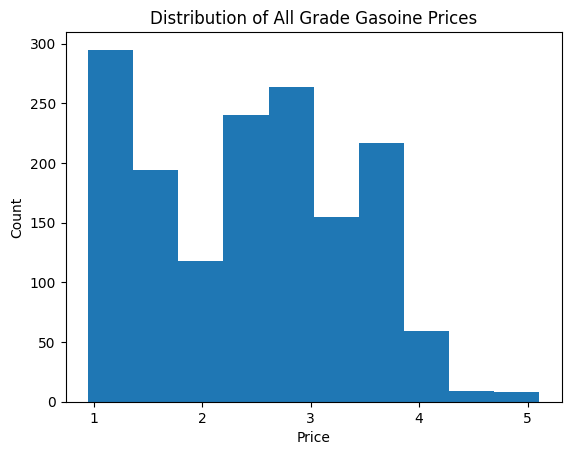

In [18]:
plt.hist(data=gas, x='A1')
plt.title('Distribution of All Grade Gasoine Prices')
plt.ylabel('Count')
plt.xlabel('Price')

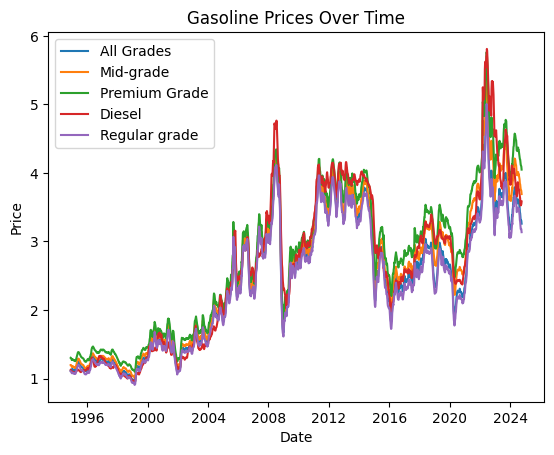

In [19]:
fig, ax = plt.subplots()

ax.plot(gas['Date'], gas['A1'], label='All Grades')
ax.plot(gas['Date'], gas['M1'], label='Mid-grade')
ax.plot(gas['Date'], gas['P1'], label='Premium Grade')
ax.plot(gas['Date'], gas['D1'], label='Diesel')
ax.plot(gas['Date'], gas['R1'], label='Regular grade')

ax.set_title('Gasoline Prices Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

plt.show()

In [20]:
import plotly.express as px

fig = px.line(x=gas['Date'], y=gas['A1'], labels={'y':'All Grades'}, template='plotly_dark')
fig.show()

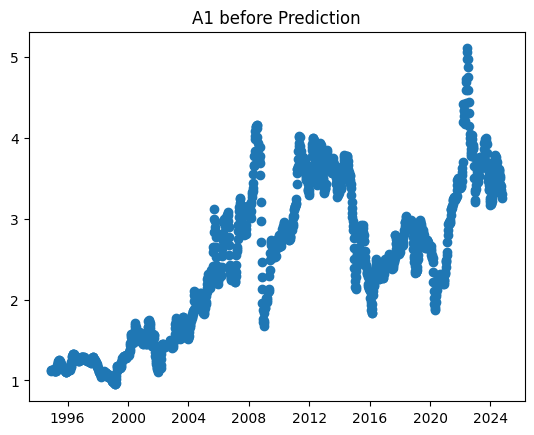

In [21]:
plt.scatter(X,Y)
plt.title('A1 before Prediction')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=42)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train['Date'] = X_train['Date'].apply(lambda x: x.toordinal())
X_test['Date'] = X_test['Date'].apply(lambda x: x.toordinal())

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

X_test['Date'] = X_test['Date'].apply(lambda x: datetime.fromordinal(x))  # Convert back to datetime for display

X_test, y_pred

(           Date
 1524 2024-02-12
 1483 2023-05-01
 354  2001-09-10
 668  2007-09-17
 1422 2022-02-28
 ...         ...
 362  2001-11-05
 622  2006-10-30
 2    1994-12-12
 6    1995-01-09
 311  2000-11-13
 
 [702 rows x 1 columns],
 array([[3.63998549],
        [3.57434478],
        [1.76682383],
        [2.26953559],
        [3.47668422],
        [1.59071462],
        [1.29453094],
        [2.1558651 ],
        [1.57950767],
        [2.00056879],
        [1.24810214],
        [1.76362185],
        [2.57532523],
        [3.64638946],
        [3.68641428],
        [1.6851732 ],
        [1.97014993],
        [2.87791288],
        [3.61757159],
        [2.02938666],
        [3.41584649],
        [1.48024611],
        [1.55229079],
        [3.19330848],
        [2.96596749],
        [1.81005064],
        [3.06522905],
        [1.6403454 ],
        [3.22052536],
        [3.13567274],
        [3.38062465],
        [1.39859547],
        [1.67716823],
        [2.14465815],
        [2.46165474],

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1467: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



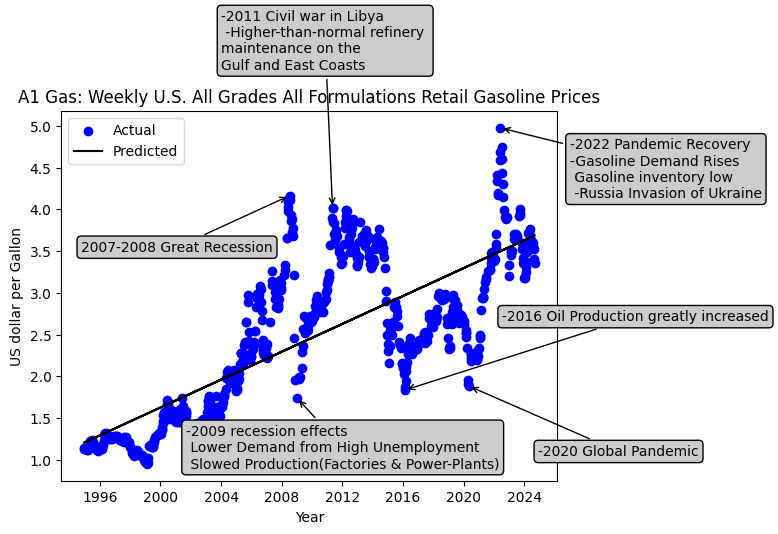

In [23]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, color='b', label='Actual')
ax.plot(X_test, y_pred, color='k', label='Predicted')

# # Annotate each point with a number starting from 0
# for i, txt in enumerate(range(len(X_test))):
#     ax.annotate(txt, (X_test.iloc[i], y_test.iloc[i]),arrowprops = dict(facecolor='yellow',shrink=0.09)) # to see which one number to annotate for later  

    
ax.annotate("2007-2008 Great Recession", (X_test.iloc[684],y_test.iloc[684]),xytext=(-150,-40),textcoords='offset points', bbox=dict(boxstyle='round',fc='0.8'),arrowprops= dict(arrowstyle='->'))

ax.annotate("-2011 Civil war in Libya\n -Higher-than-normal refinery \nmaintenance on the\nGulf and East Coasts", (X_test.iloc[607],y_test.iloc[607]),xytext=(-80,100),textcoords='offset points', bbox=dict(boxstyle='round',fc='0.8'),arrowprops= dict(arrowstyle='->'))

ax.annotate("-2009 recession effects \n Lower Demand from High Unemployment \n Slowed Production(Factories & Power-Plants)", (X_test.iloc[265],y_test.iloc[265]),xytext=(-80,-50),textcoords='offset points', bbox=dict(boxstyle='round',fc='0.8'),arrowprops= dict(arrowstyle='->'))

ax.annotate("-2020 Global Pandemic", (X_test.iloc[334],y_test.iloc[334]),xytext=(50,-50),textcoords='offset points', bbox=dict(boxstyle='round',fc='0.8'),arrowprops= dict(arrowstyle='->'))

ax.annotate("-2016 Oil Production greatly increased", (X_test.iloc[648],y_test.iloc[648]),xytext=(70,50),textcoords='offset points', bbox=dict(boxstyle='round',fc='0.8'),arrowprops= dict(arrowstyle='->'))

ax.annotate("-2022 Pandemic Recovery\n-Gasoline Demand Rises \n Gasoline inventory low\n -Russia Invasion of Ukraine", (X_test.iloc[173],y_test.iloc[173]),xytext=(50,-50),textcoords='offset points', bbox=dict(boxstyle='round',fc='0.8'),arrowprops= dict(arrowstyle='->'))

plt.title("A1 Gas: Weekly U.S. All Grades All Formulations Retail Gasoline Prices")
plt.xlabel('Year')
plt.ylabel('US dollar per Gallon')
plt.legend()
plt.show()

In [24]:
# import plotly.express as px

# # Create a DataFrame for plotting
# plot_df = X_test.copy()
# plot_df['Actual'] = y_test.values
# plot_df['Predicted'] = y_pred

# # Create the scatter plot with Plotly Express
# fig = px.scatter(plot_df, x='Date', y='Actual', color_discrete_sequence=['blue'], labels={'Actual': 'Actual'}, title="A1 Gas: Weekly U.S. All Grades All Formulations Retail Gasoline Prices")

# # Add the predicted line
# fig.add_scatter(x=plot_df['Date'], y=plot_df['Predicted'], mode='lines', name='Predicted', line=dict(color='black'))

# # Annotate each point with a number starting from 0
# for i, txt in enumerate(range(len(plot_df))):
#     fig.add_annotation(x=plot_df['Date'].iloc[i], y=plot_df['Actual'].iloc[i], text=str(txt), showarrow=True, arrowhead=1, ax=0, ay=-10, bgcolor='yellow')

# fig.update_layout(xaxis_title='Year', yaxis_title='US dollar per Gallon')
# fig.show()

In [25]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_test['Date'] = X_test['Date'].apply(lambda x: x.toordinal())

# Calculate the score
score = reg_all.score(X_test, y_test)

# Convert 'Date' column back to datetime for further use
X_test['Date'] = X_test['Date'].apply(lambda x: datetime.fromordinal(x))

print("A1-R^2" , score * 100)

Mean Squared Error: 0.35237460918169544
A1-R^2 58.67792828753156


## A Mean Squared Error (MSE) of indicates the average squared difference between the predicted and actual values in model. Generally, a lower MSE means  model’s predictions are closer to the actual values.

### Making a prediction model for A1

In [26]:
from datetime import datetime, timedelta

def A1Predict(date_str,typeOF):
    date_to_predict = datetime.strptime(date_str, '%Y-%m-%d').toordinal()
    if(typeOF == 'L'):
        predicted_value = reg_all.predict(np.array([[date_to_predict]]))
        predicted_date = datetime.fromordinal(date_to_predict)
        return predicted_value[0][0]
    else: 
        predicted_value = poly_ridge.predict(scaler.fit_transform(poly.fit_transform(np.array([[date_to_predict]]))))
        predicted_date = datetime.fromordinal(date_to_predict)

        return predicted_value[0][0]
        

# Initialize start and end dates
start_date = datetime(2024, 8, 19)
end_date = datetime(2029, 8, 19)  # Corrected end date

# Create a list to store the dates
date_list = []

# Generate dates weekly
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date)
    current_date += timedelta(weeks=1)

# Convert the list to a DataFrame
date_df = pd.DataFrame(date_list, columns=['Date'])

# Convert the 'Date' column to string format for prediction
date_df['Date'] = date_df['Date'].dt.strftime('%Y-%m-%d')

# Apply the A1Predict function to each row
date_df['A1 Prediction'] = date_df['Date'].apply(A1Predict,typeOF='L')

date_df

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\

,Date,A1 Prediction
0,2024-08-19,3.683212
1,2024-08-26,3.684813
2,2024-09-02,3.686414
3,2024-09-09,3.688015
4,2024-09-16,3.689616
...,...,...
256,2029-07-16,4.093066
257,2029-07-23,4.094667
258,2029-07-30,4.096268
259,2029-08-06,4.097869


Text(0.5, 1.0, 'A1: Linear Prediction Model (5 years)')

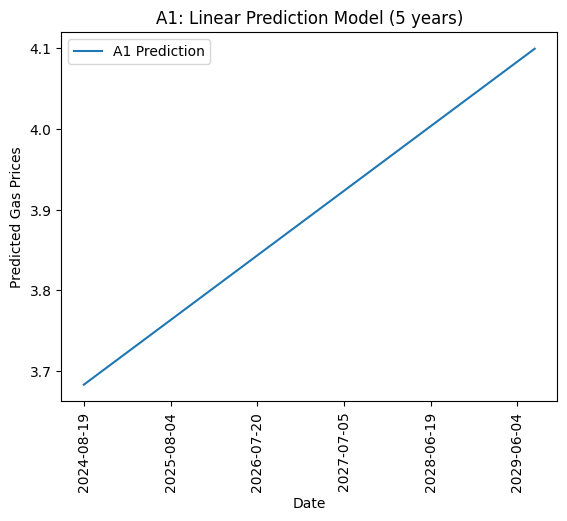

In [27]:
date_df.plot(x='Date',y='A1 Prediction')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Predicted Gas Prices')
plt.title('A1: Linear Prediction Model (5 years)')

Original set  --->  (1559, 1) (1559, 1) 
Training set  --->  (857, 1) (857, 1) 
Testing set   --->  (702, 1) (702, 1)


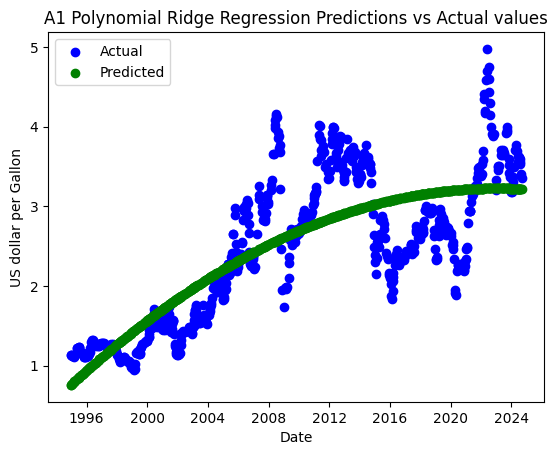

Accuracy: 64.67586392823976
Mean Squared Error: 0.35237460918169544


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=42)

# Shape of Training set and Testing set
print('Original set  ---> ', X.shape, Y.shape, '\nTraining set  ---> ', X_train.shape, y_train.shape, '\nTesting set   ---> ', X_test.shape, y_test.shape)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train['Date'] = X_train['Date'].apply(lambda x: x.toordinal())
X_test['Date'] = X_test['Date'].apply(lambda x: x.toordinal())

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_ridge = Ridge()
poly_ridge.fit(X_train_poly, y_train)
poly_ridge_predictions = poly_ridge.predict(X_test_poly)

# Calculate the score
score = poly_ridge.score(X_test_poly, y_test)

# Convert 'Date' column back to datetime for further use
X_test['Date'] = X_test['Date'].apply(lambda x: datetime.fromordinal(x))

# Scatter plot
plt.scatter(X_test['Date'], y_test, color='b', label='Actual')
plt.scatter(X_test['Date'], poly_ridge_predictions, color='g', label='Predicted')
plt.xlabel('Date')
plt.ylabel('US dollar per Gallon')
plt.title('A1 Polynomial Ridge Regression Predictions vs Actual values')
plt.legend()
plt.show()

# Display the results
print('Accuracy:',score * 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

In [29]:
date_df['A1 Poly Prediction'] = date_df['Date'].apply(A1Predict,typeOF='R')

date_df['A1 Poly Prediction']

0      2.685468
1      2.685468
2      2.685468
3      2.685468
4      2.685468
         ...   
256    2.685468
257    2.685468
258    2.685468
259    2.685468
260    2.685468
Name: A1 Poly Prediction, Length: 261, dtype: float64

## Training R1 Data

In [30]:
# R1

Y_R1 = gas.iloc[:,3:4] # R1 
X_R1= gas.iloc[:,0:1]

print(Y)
# Assuming X and Y are already defined
X_train_R1, X_test_R1, y_train_R1, y_test_R1 = train_test_split(X_R1, Y_R1, test_size=0.45, random_state=42)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_R1['Date'] = X_train_R1['Date'].apply(lambda x: x.toordinal())
X_test_R1['Date'] = X_test_R1['Date'].apply(lambda x: x.toordinal())

reg_all_R1 = LinearRegression()
reg_all_R1.fit(X_train_R1, y_train_R1)
y_pred_R1= reg_all.predict(X_test_R1)

X_test_R1['Date'] = X_test_R1['Date'].apply(lambda x: datetime.fromordinal(x))  # Convert back to datetime for display

# X_test_R1, y_pred_R1

         A1
0     1.117
1     1.127
2     1.131
3     1.134
4     1.125
...     ...
1554  3.360
1555  3.307
1556  3.311
1557  3.303
1558  3.260

[1559 rows x 1 columns]


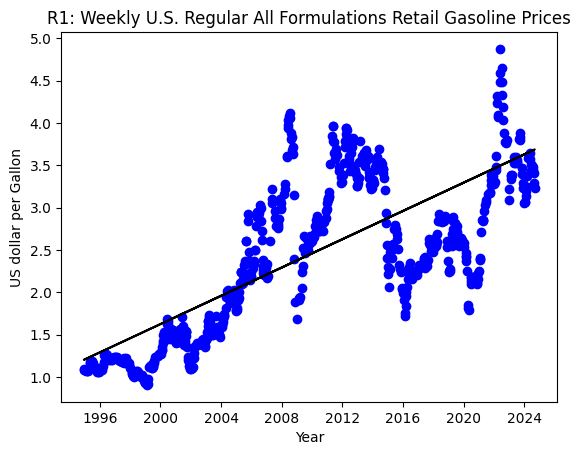

In [31]:
plt.scatter(X_test_R1, y_test_R1, color ='b') 
plt.plot(X_test_R1, y_pred_R1, color ='k') 
plt.title("R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices")
plt.xlabel('Year')
plt.ylabel('US dollar per Gallon')
plt.show()

In [32]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_R1, y_pred_R1))
# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_test_R1['Date'] = X_test_R1['Date'].apply(lambda x: x.toordinal())

# Calculate the score
score = reg_all.score(X_test_R1, y_test_R1)

# Convert 'Date' column back to datetime for further use
X_test_R1['Date'] = X_test_R1['Date'].apply(lambda x: datetime.fromordinal(x))

print('R^2' , score * 100)

Mean Squared Error: 0.3649554637473779
R^2 55.79005006053881


Original set  --->  (1559, 1) (1559, 1) 
Training set  --->  (857, 1) (857, 1) 
Testing set   --->  (702, 1) (702, 1)


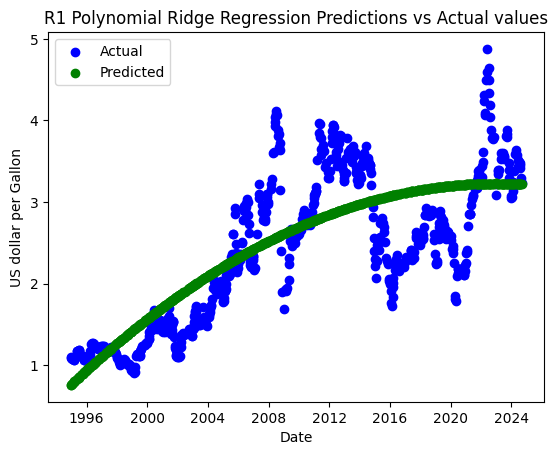

Accuracy: 62.37848560773413
Mean Squared Error: 0.3649554637473779


In [33]:
# POLY R1
# Split the data into training and testing sets
X_train_R1, X_test_R1, y_train_R1, y_test_R1 = train_test_split(X_R1, Y_R1, test_size=0.45, random_state=42)

# Shape of Training set and Testing set
print('Original set  ---> ', X_R1.shape, Y_R1.shape, '\nTraining set  ---> ', X_train_R1.shape, y_train_R1.shape, '\nTesting set   ---> ', X_test_R1.shape,y_test_R1.shape)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_R1['Date'] = X_train_R1['Date'].apply(lambda x: x.toordinal())
X_test_R1['Date'] = X_test_R1['Date'].apply(lambda x: x.toordinal())

# Standardize the data
scaler = StandardScaler()
X_train_R1_scaled = scaler.fit_transform(X_train_R1)
X_test_R1_scaled = scaler.transform(X_test_R1)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_R1_poly = poly.fit_transform(X_train_R1_scaled)
X_test_R1_poly = poly.transform(X_test_R1_scaled)

poly_ridge_R1 = Ridge()
poly_ridge_R1.fit(X_train_poly, y_train)
poly_ridge_predictions_R1 = poly_ridge_R1.predict(X_test_R1_poly)

# Calculate the score
score_R1 = poly_ridge_R1.score(X_test_R1_poly, y_test_R1)

# Convert 'Date' column back to datetime for further use
X_test_R1['Date'] = X_test_R1['Date'].apply(lambda x: datetime.fromordinal(x))

# Scatter plot
plt.scatter(X_test_R1['Date'], y_test_R1, color='b', label='Actual')
plt.scatter(X_test_R1['Date'], poly_ridge_predictions_R1, color='g', label='Predicted')
plt.xlabel('Date')
plt.ylabel('US dollar per Gallon')
plt.title('R1 Polynomial Ridge Regression Predictions vs Actual values')
plt.legend()
plt.show()

# Display the results
print('Accuracy:',score_R1* 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_R1, y_pred_R1))

## Training M1 Data

In [34]:
# M1
Y_M1 = gas.iloc[:,2:3] # R1 
X_M1= gas.iloc[:,0:1]

print(Y)
# Assuming X and Y are already defined
X_train_M1, X_test_M1, y_train_M1, y_test_M1 = train_test_split(X_M1, Y_M1, test_size=0.45, random_state=42)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_M1['Date'] = X_train_M1['Date'].apply(lambda x: x.toordinal())
X_test_M1['Date'] = X_test_M1['Date'].apply(lambda x: x.toordinal())

reg_all_M1 = LinearRegression()
reg_all_M1.fit(X_train_M1, y_train_M1)
y_pred_M1= reg_all.predict(X_test_M1)

X_test_M1['Date'] = X_test_M1['Date'].apply(lambda x: datetime.fromordinal(x))  # Convert back to datetime for display


         A1
0     1.117
1     1.127
2     1.131
3     1.134
4     1.125
...     ...
1554  3.360
1555  3.307
1556  3.311
1557  3.303
1558  3.260

[1559 rows x 1 columns]


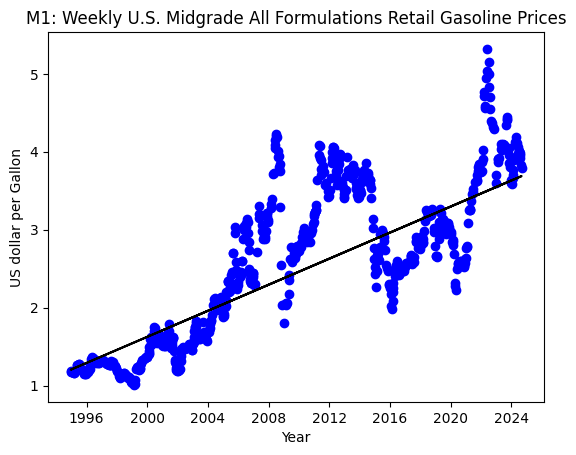

In [35]:
plt.scatter(X_test_M1, y_test_M1, color ='b') 
plt.plot(X_test_M1, y_pred_M1, color ='k') 
plt.title('M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices')
plt.xlabel('Year')
plt.ylabel('US dollar per Gallon')
plt.show()

In [36]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_M1, y_pred_M1))
# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_test_M1['Date'] = X_test_M1['Date'].apply(lambda x: x.toordinal())

# Calculate the score
score = reg_all.score(X_test_M1, y_test_M1)

# Convert 'Date' column back to datetime for further use
X_test_M1['Date'] = X_test_M1['Date'].apply(lambda x: datetime.fromordinal(x))

print('M1 R^2' , score * 100)

Mean Squared Error: 0.3496907329690473
M1 R^2 64.3336906708332


Original set  --->  (1559, 1) (1559, 1) 
Training set  --->  (857, 1) (857, 1) 
Testing set   --->  (702, 1) (702, 1)


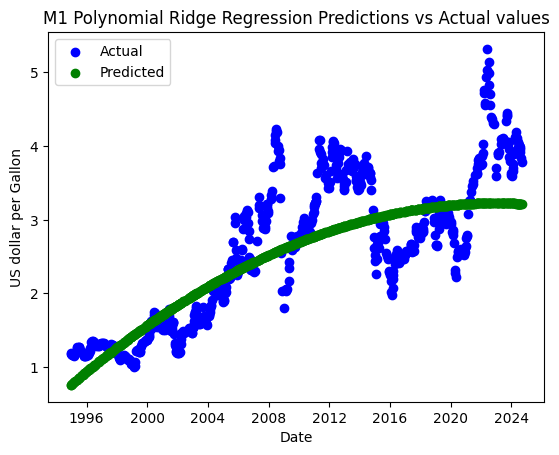

Accuracy: 62.37848560773413
Mean Squared Error: 0.3496907329690473


In [37]:
# M1 POLY 

# Split the data into training and testing sets
X_train_M1, X_test_M1, y_train_M1, y_test_M1 = train_test_split(X_M1, Y_M1, test_size=0.45, random_state=42)

# Shape of Training set and Testing set
print('Original set  ---> ', X_M1.shape, Y_M1.shape, '\nTraining set  ---> ', X_train_M1.shape, y_train_M1.shape, '\nTesting set   ---> ', X_test_M1.shape,y_test_M1.shape)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_M1['Date'] = X_train_M1['Date'].apply(lambda x: x.toordinal())
X_test_M1['Date'] = X_test_M1['Date'].apply(lambda x: x.toordinal())

# Standardize the data
scaler = StandardScaler()
X_train_M1_scaled = scaler.fit_transform(X_train_M1)
X_test_M1_scaled = scaler.transform(X_test_M1)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_M1_poly = poly.fit_transform(X_train_M1_scaled)
X_test_M1_poly = poly.transform(X_test_M1_scaled)

poly_ridge_M1 = Ridge()
poly_ridge_M1.fit(X_train_poly, y_train)
poly_ridge_predictions_M1 = poly_ridge_M1.predict(X_test_M1_poly)

# Calculate the score
score_M1 = poly_ridge_M1.score(X_test_M1_poly, y_test_M1)

# Convert 'Date' column back to datetime for further use
X_test_M1['Date'] = X_test_M1['Date'].apply(lambda x: datetime.fromordinal(x))

# Scatter plot
plt.scatter(X_test_M1['Date'], y_test_M1, color='b', label='Actual')
plt.scatter(X_test_M1['Date'], poly_ridge_predictions_M1, color='g', label='Predicted')
plt.xlabel('Date')
plt.ylabel('US dollar per Gallon')
plt.title('M1 Polynomial Ridge Regression Predictions vs Actual values')
plt.legend()
plt.show()

# Display the results
print('Accuracy:',score_R1* 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_M1, y_pred_M1))

In [38]:
# P1
Y_P1 = gas.iloc[:,5:6]
X_P1= gas.iloc[:,0:1]

# Assuming X and Y are already defined
X_train_P1, X_test_P1, y_train_P1, y_test_P1 = train_test_split(X_P1, Y_P1, test_size=0.45, random_state=42)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_P1['Date'] = X_train_P1['Date'].apply(lambda x: x.toordinal())
X_test_P1['Date'] = X_test_P1['Date'].apply(lambda x: x.toordinal())

reg_all_P1 = LinearRegression()
reg_all_P1.fit(X_train_P1, y_train_P1)
y_pred_P1= reg_all.predict(X_test_P1)

X_test_P1['Date'] = X_test_P1['Date'].apply(lambda x: datetime.fromordinal(x))  # Convert back to datetime for display


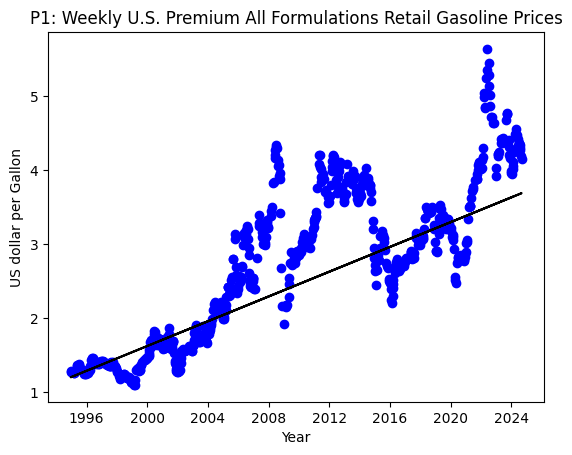

In [39]:
plt.scatter(X_test_P1, y_test_P1, color ='b') 
plt.plot(X_test_P1, y_pred_P1, color ='k') 
plt.title('P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices')
plt.xlabel('Year')
plt.ylabel('US dollar per Gallon')
plt.show()

In [40]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_P1, y_pred_P1))
# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_test_P1['Date'] = X_test_P1['Date'].apply(lambda x: x.toordinal())

# Calculate the score
score = reg_all.score(X_test_P1, y_test_P1)

# Convert 'Date' column back to datetime for further use
X_test_P1['Date'] = X_test_P1['Date'].apply(lambda x: datetime.fromordinal(x))

print('P1-R^2:' , score * 100)

Mean Squared Error: 0.42118247796154645
P1-R^2: 61.3965571436766


Original set  --->  (1559, 1) (1559, 1) 
Training set  --->  (857, 1) (857, 1) 
Testing set   --->  (702, 1) (702, 1)


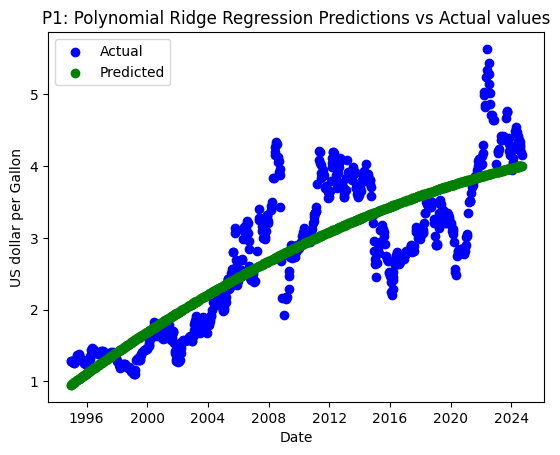

Accuracy: 73.06138247567954
Mean Squared Error: 0.29391351760981854


In [41]:
# P1 POLY

X_train_P1, X_test_P1, y_train_P1, y_test_P1 = train_test_split(X_P1, Y_P1, test_size=0.45, random_state=42)

# Shape of Training set and Testing set
print('Original set  ---> ', X_P1.shape, Y_P1.shape, '\nTraining set  ---> ', X_train_P1.shape, y_train_P1.shape, '\nTesting set   ---> ', X_test_P1.shape,y_test_P1.shape)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_P1['Date'] = X_train_P1['Date'].apply(lambda x: x.toordinal())
X_test_P1['Date'] = X_test_P1['Date'].apply(lambda x: x.toordinal())

# Standardize the data
scaler = StandardScaler()
X_train_P1_scaled = scaler.fit_transform(X_train_P1)
X_test_P1_scaled = scaler.transform(X_test_P1)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_P1_poly = poly.fit_transform(X_train_P1_scaled)
X_test_P1_poly = poly.transform(X_test_P1_scaled)

poly_ridge_P1 = Ridge()
poly_ridge_P1.fit(X_train_P1_poly, y_train_P1)
poly_ridge_predictions_P1 = poly_ridge_P1.predict(X_test_P1_poly)

# Calculate the score
score_P1 = poly_ridge_P1.score(X_test_P1_poly, y_test_P1)

# Convert 'Date' column back to datetime for further use
X_test_P1['Date'] = X_test_P1['Date'].apply(lambda x: datetime.fromordinal(x))

# Scatter plot
plt.scatter(X_test_P1['Date'], y_test_P1, color='b', label='Actual')
plt.scatter(X_test_P1['Date'], poly_ridge_predictions_P1, color='g', label='Predicted')
plt.xlabel('Date')
plt.ylabel('US dollar per Gallon')
plt.title('P1: Polynomial Ridge Regression Predictions vs Actual values')
plt.legend()
plt.show()

# Display the results
print('Accuracy:',score_P1* 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_P1, poly_ridge_predictions_P1))

In [42]:
# D1 13 
# P1
Y_D1 = gas.iloc[:,4:5] # D1

X_D1= gas.iloc[:,0:1] # date



# Assuming X and Y are already defined
X_train_D1, X_test_D1, y_train_D1, y_test_D1 = train_test_split(X_D1, Y_D1, test_size=0.2, random_state=42)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_D1['Date'] = X_train_D1['Date'].apply(lambda x: x.toordinal())
X_test_D1['Date'] = X_test_D1['Date'].apply(lambda x: x.toordinal())

reg_all_D1 = LinearRegression()
reg_all_D1.fit(X_train_D1, y_train_D1)
y_pred_D1= reg_all.predict(X_test_D1)

X_test_D1['Date'] = X_test_D1['Date'].apply(lambda x: datetime.fromordinal(x))  # Convert back to datetime for display


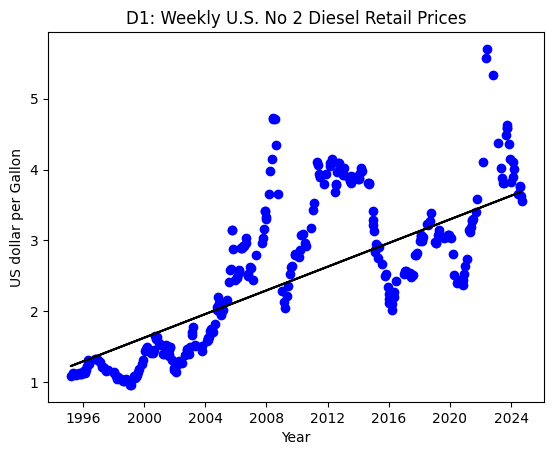

In [43]:
plt.scatter(X_test_D1, y_test_D1, color ='b') 
plt.plot(X_test_D1, y_pred_D1, color ='k') 
plt.xlabel('Year')
plt.ylabel('US dollar per Gallon')
plt.title('D1: Weekly U.S. No 2 Diesel Retail Prices')
plt.show()

In [44]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_D1, y_pred_D1))
# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_test_D1['Date'] = X_test_D1['Date'].apply(lambda x: x.toordinal())

# Calculate the score
score = reg_all.score(X_test_D1, y_test_D1)

# Convert 'Date' column back to datetime for further use
X_test_D1['Date'] = X_test_D1['Date'].apply(lambda x: datetime.fromordinal(x))

print('D1 R^2' , score * 100)

Mean Squared Error: 0.4973211253773569
D1 R^2 57.38023588379417


In [45]:
from datetime import datetime, timedelta

def D1Predict(date_str,typeOF):
    date_to_predict = datetime.strptime(date_str, '%Y-%m-%d').toordinal()
    if(typeOF == 'L'):
        predicted_value = reg_all_D1.predict(np.array([[date_to_predict]]))
        predicted_date = datetime.fromordinal(date_to_predict)
        return predicted_value[0][0]
    else: 
        predicted_value = poly_ridge_D1.predict(scaler.fit_transform(poly.fit_transform(np.array([[date_to_predict]]))))
        predicted_date = datetime.fromordinal(date_to_predict)

        return predicted_value[0][0]
        

# Initialize start and end dates
start_date = datetime(2024, 8, 19)
end_date = datetime(2029, 12, 31)  # Corrected end date

# Create a list to store the dates
date_list = []

# Generate dates weekly
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date)
    current_date += timedelta(weeks=1)

# Convert the list to a DataFrame
date_df_D1 = pd.DataFrame(date_list, columns=['Date'])

# Convert the 'Date' column to string format for prediction
date_df_D1['Date'] = date_df_D1['Date'].dt.strftime('%Y-%m-%d')

# Apply the A1Predict function to each row
date_df_D1['D1 Prediction'] = date_df_D1['Date'].apply(D1Predict,typeOF='L')

date_df_D1

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\

,Date,D1 Prediction
0,2024-08-19,4.166131
1,2024-08-26,4.168135
2,2024-09-02,4.170140
3,2024-09-09,4.172145
4,2024-09-16,4.174150
...,...,...
276,2029-12-03,4.719477
277,2029-12-10,4.721482
278,2029-12-17,4.723487
279,2029-12-24,4.725492


Original set  --->  (1559, 1) (1559, 1) 
Training set  --->  (1091, 1) (1091, 1) 
Testing set   --->  (468, 1) (468, 1)


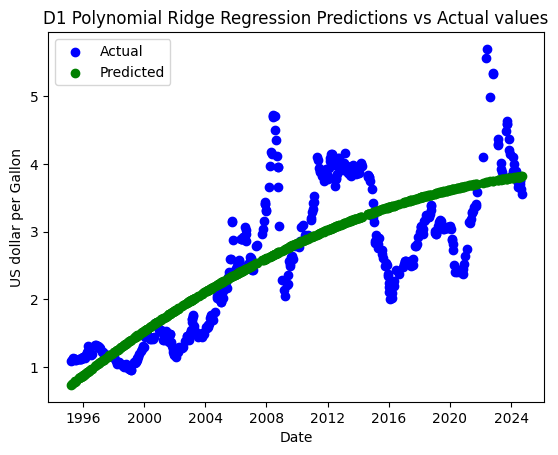

Accuracy: 64.0604450584225
Mean Squared Error: 0.4228305176283351


In [46]:
# D1 POLY
X_train_D1, X_test_D1, y_train_D1, y_test_D1 = train_test_split(X_D1, Y_D1, test_size=0.3, random_state=42)


# Shape of Training set and Testing set
print('Original set  ---> ', X_D1.shape, Y_D1.shape, '\nTraining set  ---> ', X_train_D1.shape, y_train_D1.shape, '\nTesting set   ---> ', X_test_D1.shape,y_test_D1.shape)

# Convert the 'Date' column to ordinal to avoid DTypePromotionError
X_train_D1['Date'] = X_train_D1['Date'].apply(lambda x: x.toordinal())
X_test_D1['Date'] = X_test_D1['Date'].apply(lambda x: x.toordinal())

# Standardize the data
scaler = StandardScaler()
X_train_D1_scaled = scaler.fit_transform(X_train_D1)
X_test_D1_scaled = scaler.transform(X_test_D1)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_D1_poly = poly.fit_transform(X_train_D1_scaled)
X_test_D1_poly = poly.transform(X_test_D1_scaled)

poly_ridge_D1 = Ridge()
poly_ridge_D1.fit(X_train_D1_poly, y_train_D1)
poly_ridge_predictions_D1 = poly_ridge_D1.predict(X_test_D1_poly)

# Calculate the score
score_D1 = poly_ridge_D1.score(X_test_D1_poly, y_test_D1)

# Convert 'Date' column back to datetime for further use
X_test_D1['Date'] = X_test_D1['Date'].apply(lambda x: datetime.fromordinal(x))

# Scatter plot
plt.scatter(X_test_D1['Date'], y_test_D1, color='b', label='Actual')
plt.scatter(X_test_D1['Date'], poly_ridge_predictions_D1, color='g', label='Predicted')
plt.xlabel('Date')
plt.ylabel('US dollar per Gallon')
plt.title('D1 Polynomial Ridge Regression Predictions vs Actual values')
plt.legend()
plt.show()

# Display the results
print('Accuracy:', score_D1 * 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_D1, poly_ridge_predictions_D1))

# https://skforecast.org/0.13.0/index.html


In [47]:
import copy

newGas = copy.copy(gas)

newGas = newGas.set_index("Date")
newGas = newGas.sort_index()
newGas = newGas.asfreq('W-MON')  # Set frequency to weekly, starting on Monday
newGas = newGas.sort_index(ascending=True)
newGas

,A1,M1,R1,D1,P1
Date,,,,,
1994-11-28,1.117,1.197,1.105,1.126,1.303
1994-12-05,1.127,1.197,1.103,1.123,1.301
1994-12-12,1.131,1.188,1.095,1.114,1.288
1994-12-19,1.134,1.179,1.087,1.109,1.279
1994-12-26,1.125,1.171,1.077,1.106,1.270
...,...,...,...,...,...
2024-09-09,3.360,3.791,3.236,3.555,4.153
2024-09-16,3.307,3.755,3.180,3.526,4.119
2024-09-23,3.311,3.751,3.185,3.539,4.108


In [48]:
start_date = newGas.index.min()
end_date = newGas.index.max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq=newGas.index.freq)
is_index_complete = (newGas.index == complete_date_range).all()
print(f"Index complete: {is_index_complete}")

Index complete: True


In [49]:
# steps = 200
# data_train = newGas[:-steps]
# data_test  = newGas[-steps:]
# print(
#     f"Train dates : {data_train.index.min()} --- "
#     f"{data_train.index.max()}  (n={len(data_train)})"
# )
# print(
#     f"Test dates  : {data_test.index.min()} --- "
#     f"{data_test.index.max()}  (n={len(data_test)})"
# )

# fig, ax = plt.subplots(figsize=(6, 2.5))
# data_train['A1'].plot(ax=ax, label='train')
# data_test['A1'].plot(ax=ax, label='test')
# ax.legend();

In [50]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from skforecast.ForecasterAutoreg import ForecasterAutoreg
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Define the start and end dates for the split
# start_date = '2013-01-07'  # Replace with actual start date
# end_date = '2024-10-07'    # Replace with actual end date

# # Split the data into training and testing sets based on the date range
# train_data = newGas.loc[start_date:]
# test_data = newGas.loc[start_date:end_date]

# # Check the shape of the splits
# print(f"Training data: {train_data.shape}")
# print(f"Testing data: {test_data.shape}")

# train_data

In [51]:
# fig, ax = plt.subplots(figsize=(6, 2.5))
# train_data['A1'].plot(ax=ax, label='train')
# test_data['A1'].plot(ax=ax, label='test')
# ax.legend();

Train dates : 2019-12-30 00:00:00 --- 2024-10-07 00:00:00  (n=250)
Test dates  : 1994-11-28 00:00:00 --- 2019-12-23 00:00:00  (n=1309)


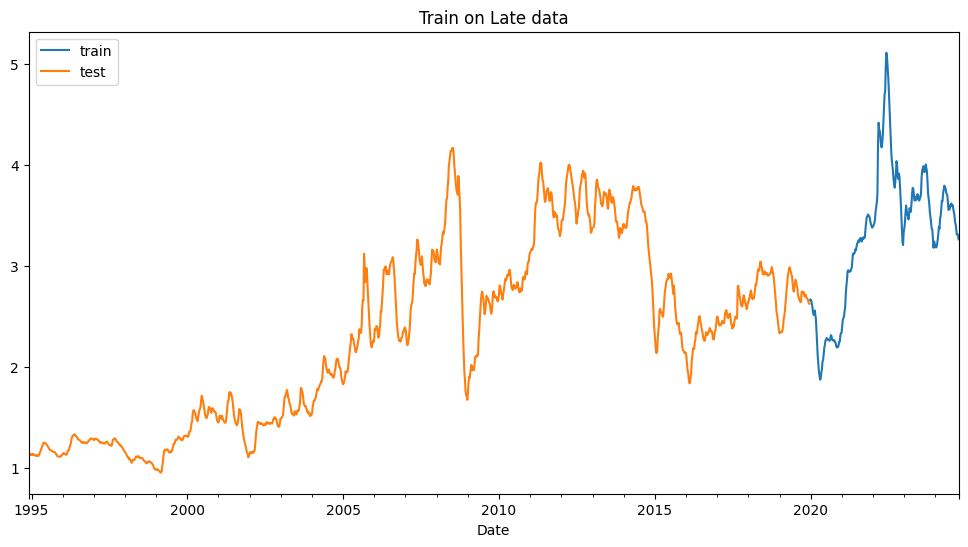

In [52]:

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
steps = 250
data_train = newGas[-steps:]   
data_test  = newGas[:-steps]
print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)

fig, ax = plt.subplots(figsize=(12, 6))
data_train['A1'].plot(ax=ax, label='train')
data_test['A1'].plot(ax=ax, label='test')
ax.set_title('Train on Late data')
ax.legend();

https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

In [53]:
from xgboost import XGBRegressor
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags = 6,
             )

forecaster_gb= ForecasterAutoreg(regressor = XGBRegressor(random_state=123),
                                lags=6,
                                )
forecaster.fit(y=data_train['A1'])

forecaster_gb.fit(y=data_train['A1'])
#forecaster
#forecaster_gb

In [54]:
steps = 35 # Predicts 35 week into future 
predictions = forecaster.predict(steps=steps)
predictions

predictionGB= forecaster_gb.predict(steps=steps)
predictionGB

2024-10-14    3.212309
2024-10-21    3.263628
2024-10-28    3.242885
2024-11-04    3.215225
2024-11-11    3.213114
2024-11-18    3.237533
2024-11-25    3.239831
2024-12-02    3.230566
2024-12-09    3.257982
2024-12-16    3.269492
2024-12-23    3.274995
2024-12-30    3.273594
2025-01-06    3.281210
2025-01-13    3.273752
2025-01-20    3.272959
2025-01-27    3.272521
2025-02-03    3.264214
2025-02-10    3.268220
2025-02-17    3.256544
2025-02-24    3.242356
2025-03-03    3.227219
2025-03-10    3.223099
2025-03-17    3.228589
2025-03-24    3.228109
2025-03-31    3.230566
2025-04-07    3.256539
2025-04-14    3.272116
2025-04-21    3.267094
2025-04-28    3.272565
2025-05-05    3.276365
2025-05-12    3.264918
2025-05-19    3.276867
2025-05-26    3.265276
2025-06-02    3.269869
2025-06-09    3.266455
Freq: W-MON, Name: pred, dtype: float64

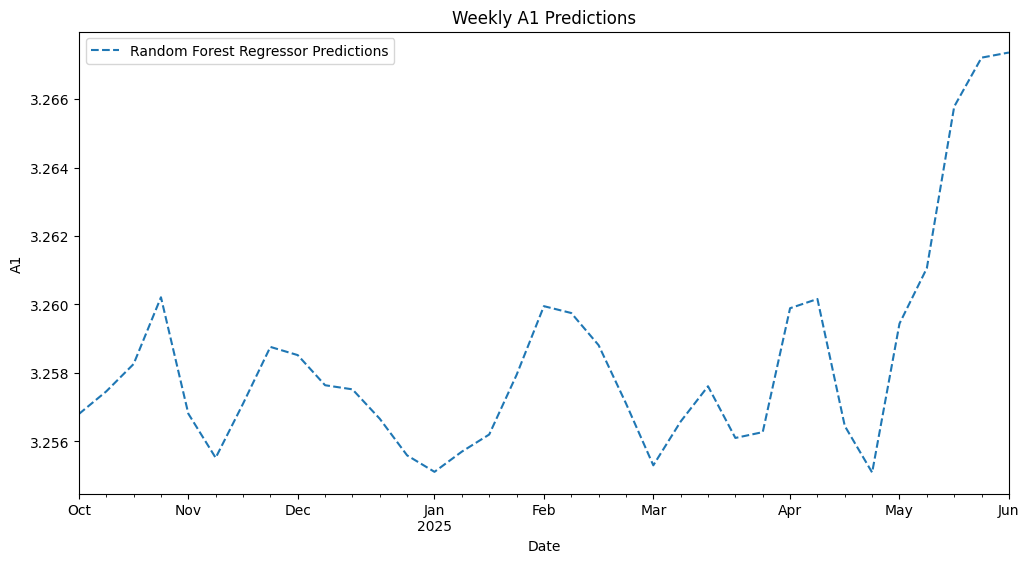

In [55]:
# Ensure the index of predictions is of the same type as train_data and test_data
predictions.index = pd.date_range(start=data_train.index[-1], periods=steps, freq='W-MON')

# Plot only the predictions with weekly dates
fig, ax = plt.subplots(figsize=(12, 6))
predictions.plot(ax=ax, label='Random Forest Regressor Predictions', linestyle='--')
ax.legend()
ax.set_title('Weekly A1 Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('A1')
plt.show()

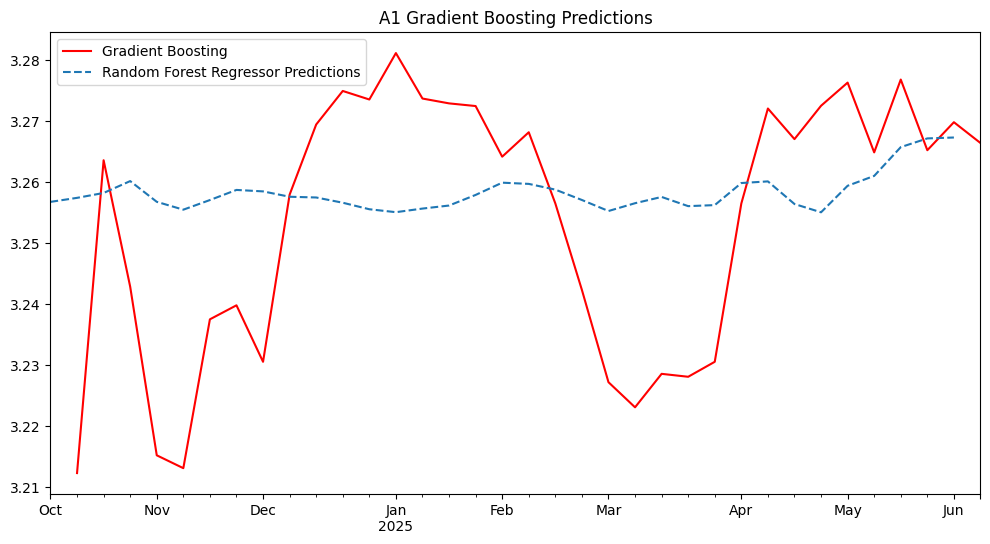

In [56]:

# Plot the predictions from the Gradient Boosting model
fig, ax = plt.subplots(figsize=(12, 6))

predictionGB.plot(ax=ax, label='Gradient Boosting', color='red')
predictions.plot(ax=ax, label='Random Forest Regressor Predictions', linestyle='--')

ax.set_title('A1 Gradient Boosting Predictions')
ax.legend()
plt.show()

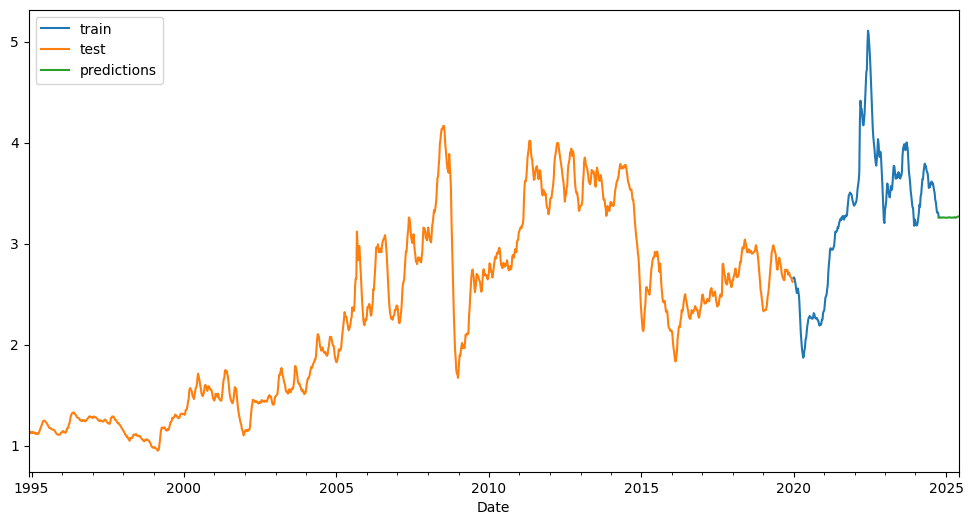

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
data_train['A1'].plot(ax=ax, label='train')
data_test['A1'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [58]:
forecasterM1 = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags = 6
             )
forecasterM1.fit(y=data_train['M1'])
forecasterM1

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-12-30 00:00:00'), Timestamp('2024-10-07 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-MON 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-10-23 16:25:12 
Last fit date: 2024-10-23 16:25:12 
Skforecast version: 0.13.0 
Python version: 3.12.7 


In [59]:
steps = 36 # Predicts 35 week into future 
predictionsM1 = forecaster.predict(steps=steps)
predictionsM1

2024-10-14    3.25680
2024-10-21    3.25746
2024-10-28    3.25826
2024-11-04    3.26021
2024-11-11    3.25681
2024-11-18    3.25552
2024-11-25    3.25710
2024-12-02    3.25876
2024-12-09    3.25852
2024-12-16    3.25764
2024-12-23    3.25752
2024-12-30    3.25666
2025-01-06    3.25559
2025-01-13    3.25511
2025-01-20    3.25570
2025-01-27    3.25620
2025-02-03    3.25794
2025-02-10    3.25995
2025-02-17    3.25975
2025-02-24    3.25881
2025-03-03    3.25711
2025-03-10    3.25530
2025-03-17    3.25658
2025-03-24    3.25761
2025-03-31    3.25610
2025-04-07    3.25627
2025-04-14    3.25989
2025-04-21    3.26016
2025-04-28    3.25645
2025-05-05    3.25509
2025-05-12    3.25944
2025-05-19    3.26106
2025-05-26    3.26578
2025-06-02    3.26721
2025-06-09    3.26736
2025-06-16    3.26789
Freq: W-MON, Name: pred, dtype: float64

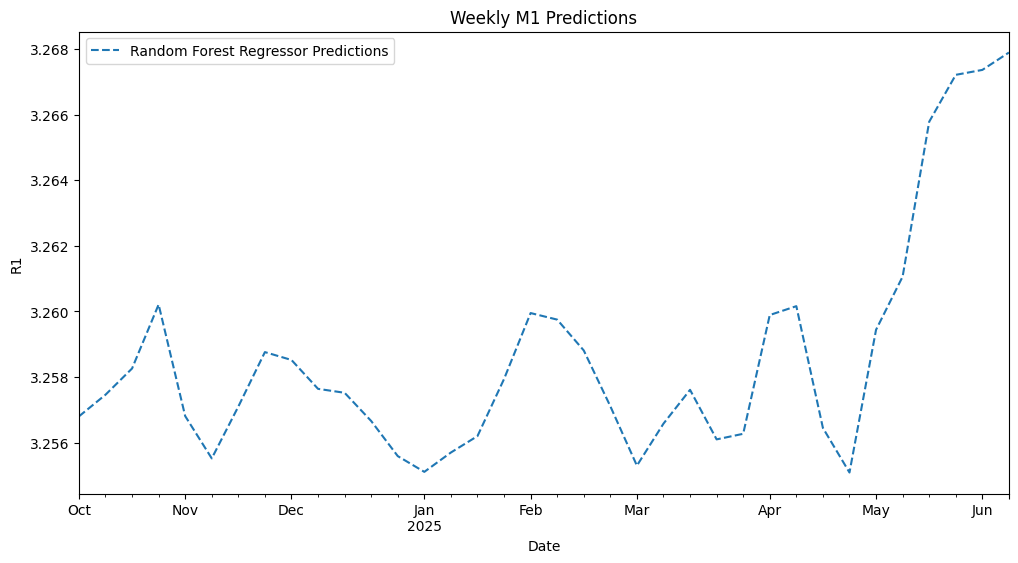

In [60]:
# Ensure the index of predictions is of the same type as train_data and test_data
predictionsM1.index = pd.date_range(start=data_train.index[-1], periods=steps, freq='W-MON')

# Plot only the predictions with weekly dates
fig, ax = plt.subplots(figsize=(12, 6))
predictionsM1.plot(ax=ax, label='Random Forest Regressor Predictions', linestyle='--')
ax.legend()
ax.set_title('Weekly M1 Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('R1')
plt.show()

In [61]:
forecasterR1 = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags = 6
             )
forecasterR1.fit(y=data_train['R1'])
forecasterR1

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-12-30 00:00:00'), Timestamp('2024-10-07 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-MON 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-10-23 16:25:12 
Last fit date: 2024-10-23 16:25:12 
Skforecast version: 0.13.0 
Python version: 3.12.7 


In [62]:
steps = 36 # Predicts 35 week into future 
predictionsR1 = forecaster.predict(steps=steps)
predictionsR1

2024-10-14    3.25680
2024-10-21    3.25746
2024-10-28    3.25826
2024-11-04    3.26021
2024-11-11    3.25681
2024-11-18    3.25552
2024-11-25    3.25710
2024-12-02    3.25876
2024-12-09    3.25852
2024-12-16    3.25764
2024-12-23    3.25752
2024-12-30    3.25666
2025-01-06    3.25559
2025-01-13    3.25511
2025-01-20    3.25570
2025-01-27    3.25620
2025-02-03    3.25794
2025-02-10    3.25995
2025-02-17    3.25975
2025-02-24    3.25881
2025-03-03    3.25711
2025-03-10    3.25530
2025-03-17    3.25658
2025-03-24    3.25761
2025-03-31    3.25610
2025-04-07    3.25627
2025-04-14    3.25989
2025-04-21    3.26016
2025-04-28    3.25645
2025-05-05    3.25509
2025-05-12    3.25944
2025-05-19    3.26106
2025-05-26    3.26578
2025-06-02    3.26721
2025-06-09    3.26736
2025-06-16    3.26789
Freq: W-MON, Name: pred, dtype: float64

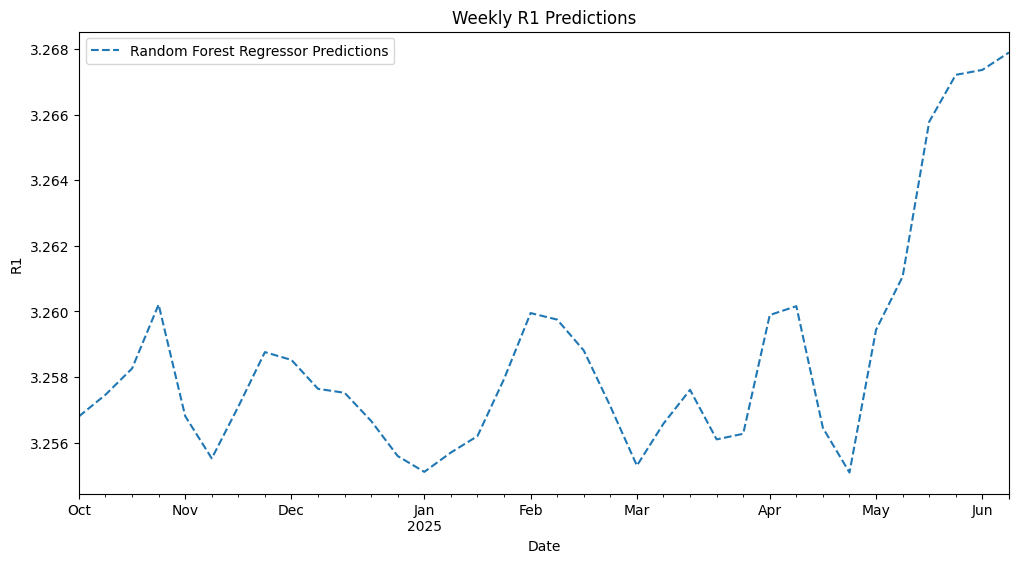

In [63]:
# Ensure the index of predictions is of the same type as train_data and test_data
predictionsR1.index = pd.date_range(start=data_train.index[-1], periods=steps, freq='W-MON')

# Plot only the predictions with weekly dates
fig, ax = plt.subplots(figsize=(12, 6))
predictionsR1.plot(ax=ax, label='Random Forest Regressor Predictions', linestyle='--')
ax.legend()
ax.set_title('Weekly R1 Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('R1')
plt.show()

In [64]:
forecasterD1 = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags = 6
             )
forecasterD1.fit(y=data_train['D1'])
forecasterD1

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-12-30 00:00:00'), Timestamp('2024-10-07 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-MON 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-10-23 16:25:13 
Last fit date: 2024-10-23 16:25:13 
Skforecast version: 0.13.0 
Python version: 3.12.7 


In [65]:
steps = 36 # Predicts 36 week into future 
predictionsD1 = forecasterD1.predict(steps=steps)
predictionsD1

2024-10-14    3.63910
2024-10-21    3.64965
2024-10-28    3.66059
2024-11-04    3.71362
2024-11-11    3.72726
2024-11-18    3.73345
2024-11-25    3.73765
2024-12-02    3.73767
2024-12-09    3.72963
2024-12-16    3.70764
2024-12-23    3.67884
2024-12-30    3.66728
2025-01-06    3.67724
2025-01-13    3.67583
2025-01-20    3.68130
2025-01-27    3.68828
2025-02-03    3.69914
2025-02-10    3.70357
2025-02-17    3.70466
2025-02-24    3.70439
2025-03-03    3.70415
2025-03-10    3.70199
2025-03-17    3.69323
2025-03-24    3.68179
2025-03-31    3.68119
2025-04-07    3.68310
2025-04-14    3.68360
2025-04-21    3.68512
2025-04-28    3.69704
2025-05-05    3.70400
2025-05-12    3.70436
2025-05-19    3.70520
2025-05-26    3.70429
2025-06-02    3.70351
2025-06-09    3.69323
2025-06-16    3.68179
Freq: W-MON, Name: pred, dtype: float64

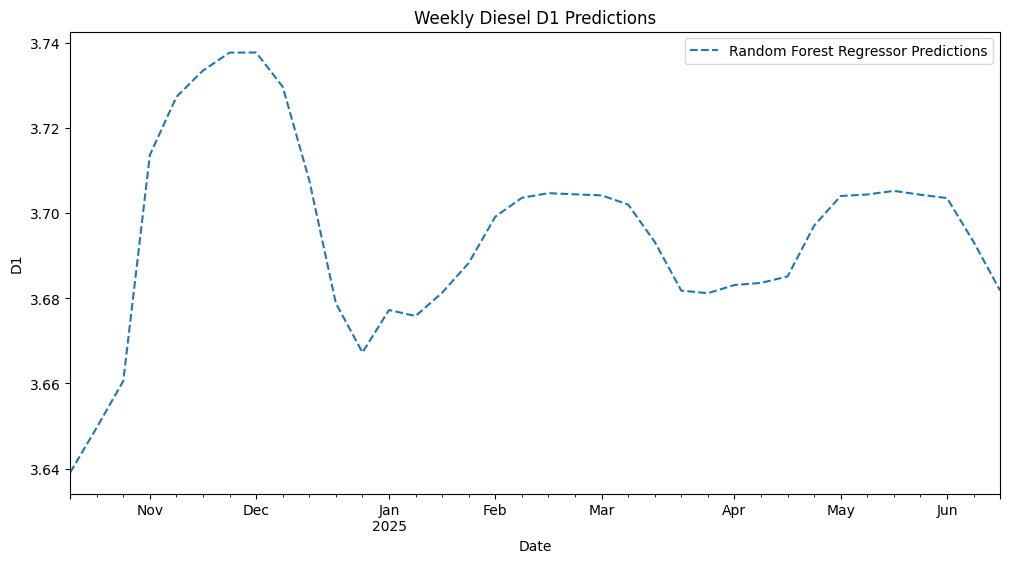

In [66]:
# Ensure the index of predictions is of the same type as train_data and test_data
# Plot only the predictions with weekly dates
fig, ax = plt.subplots(figsize=(12, 6))
predictionsD1.plot(ax=ax, label='Random Forest Regressor Predictions', linestyle='--')
ax.legend()
ax.set_title('Weekly Diesel D1 Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('D1')
plt.show()

In [67]:
forecasterP1 = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=1),
                 lags = 6
             )
forecasterP1.fit(y=data_train['P1'])
forecasterP1

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=1) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-12-30 00:00:00'), Timestamp('2024-10-07 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-MON 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-10-23 16:25:13 
Last fit date: 2024-10-23 16:25:13 
Skforecast version: 0.13.0 
Python version: 3.12.7 
Fore

In [68]:
steps = 36 # Predicts 35 week into future 
predictionsP1 = forecasterP1.predict(steps=steps)
predictionsP1

2024-10-14    4.03741
2024-10-21    4.02039
2024-10-28    4.01265
2024-11-04    4.01228
2024-11-11    4.02342
2024-11-18    4.02736
2024-11-25    4.04158
2024-12-02    4.05774
2024-12-09    4.11013
2024-12-16    4.16239
2024-12-23    4.18424
2024-12-30    4.23346
2025-01-06    4.27136
2025-01-13    4.27433
2025-01-20    4.24796
2025-01-27    4.25165
2025-02-03    4.23330
2025-02-10    4.22191
2025-02-17    4.23481
2025-02-24    4.24845
2025-03-03    4.26692
2025-03-10    4.25454
2025-03-17    4.24286
2025-03-24    4.26477
2025-03-31    4.22779
2025-04-07    4.22740
2025-04-14    4.25095
2025-04-21    4.23650
2025-04-28    4.26441
2025-05-05    4.25448
2025-05-12    4.24413
2025-05-19    4.26076
2025-05-26    4.22599
2025-06-02    4.23266
2025-06-09    4.25100
2025-06-16    4.23628
Freq: W-MON, Name: pred, dtype: float64

In [69]:
#this here is linear thing i moved it down so i can try to do a comparision but it wasnt perfect you can move it back up where p1 is if you done using it 
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

def P1Predict(date_str, typeOF):
    date_to_predict = datetime.strptime(date_str, '%Y-%m-%d').toordinal()
    if(typeOF == 'L'):
        predicted_value = reg_all.predict(np.array([[date_to_predict]]))
        predicted_date = datetime.fromordinal(date_to_predict)
        return predicted_value[0][0]
    else: 
        predicted_value = poly_ridge.predict(scaler.fit_transform(poly.fit_transform(np.array([[date_to_predict]]))))
        predicted_date = datetime.fromordinal(date_to_predict)
        return predicted_value[0][0]

# Initialize start and end dates
start_date = datetime(2024, 10, 14)
end_date = datetime(2025, 6, 9)  # Corrected end date

# Create a list to store the dates
date_list = []

# Generate dates weekly
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date)
    current_date += timedelta(weeks=1)

# Convert the list to a DataFrame
date_dfP1 = pd.DataFrame(date_list, columns=['Date'])

# Convert the 'Date' column to string format for prediction
date_dfP1['Date'] = date_dfP1['Date'].dt.strftime('%Y-%m-%d')

# Apply the P1Predict function to each row
date_dfP1['P1 Prediction'] = date_dfP1['Date'].apply(P1Predict, typeOF='L')

date_dfP1


c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\chris\

,Date,P1 Prediction
0,2024-10-14,3.696020
1,2024-10-21,3.697621
2,2024-10-28,3.699222
3,2024-11-04,3.700823
4,2024-11-11,3.702424
5,2024-11-18,3.704025
6,2024-11-25,3.705626
7,2024-12-02,3.707227
8,2024-12-09,3.708828
9,2024-12-16,3.710429


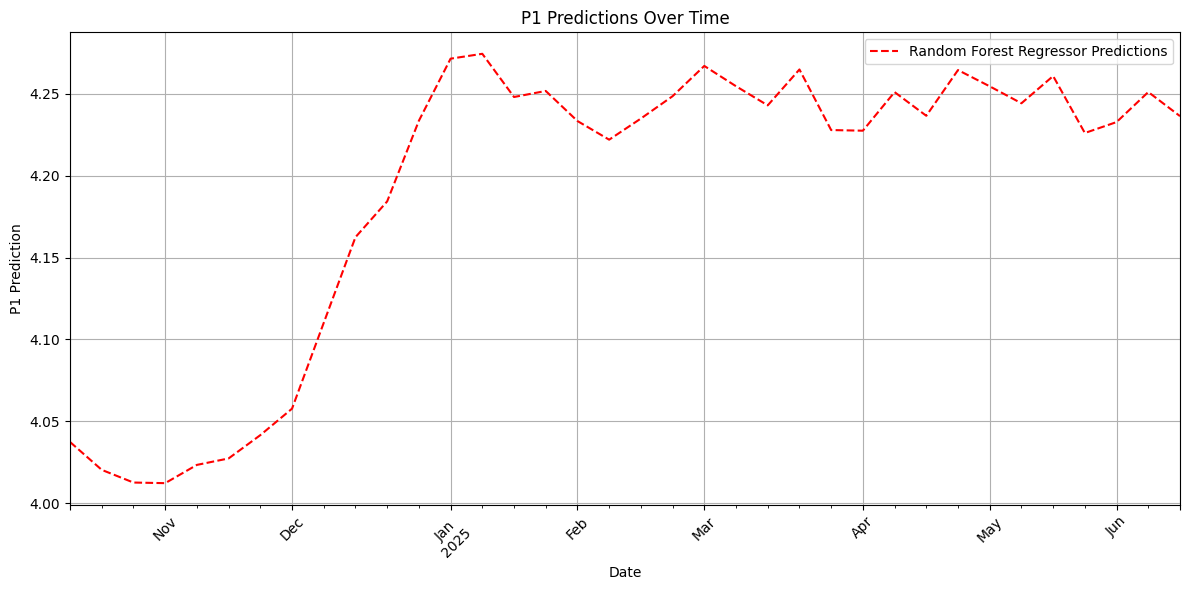

In [70]:
# Ensure the 'Date' column in date_dfP1 is in datetime format
date_dfP1['Date'] = pd.to_datetime(date_dfP1['Date'])

# Generate predictionsP1 with a datetime index


# Plot the original P1 predictions over time
plt.figure(figsize=(12, 6))


# Plot the new predictions with weekly dates
predictionsP1.plot(label='Random Forest Regressor Predictions', linestyle='--', color='r')

# Customize the plot
plt.title('P1 Predictions Over Time')
plt.xlabel('Date')
plt.ylabel('P1 Prediction')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Early Data training

In [71]:
# error_mse = mean_squared_error(
#                 y_true = data_test['P1'],
#                 y_pred = predictions
#             )
# print(f"Test error (MSE): {error_mse}")

Train dates : 1994-11-28 00:00:00 --- 2024-10-07 00:00:00  (n=250)
Test dates  : 2019-12-30 00:00:00 --- 2019-12-23 00:00:00  (n=1309)


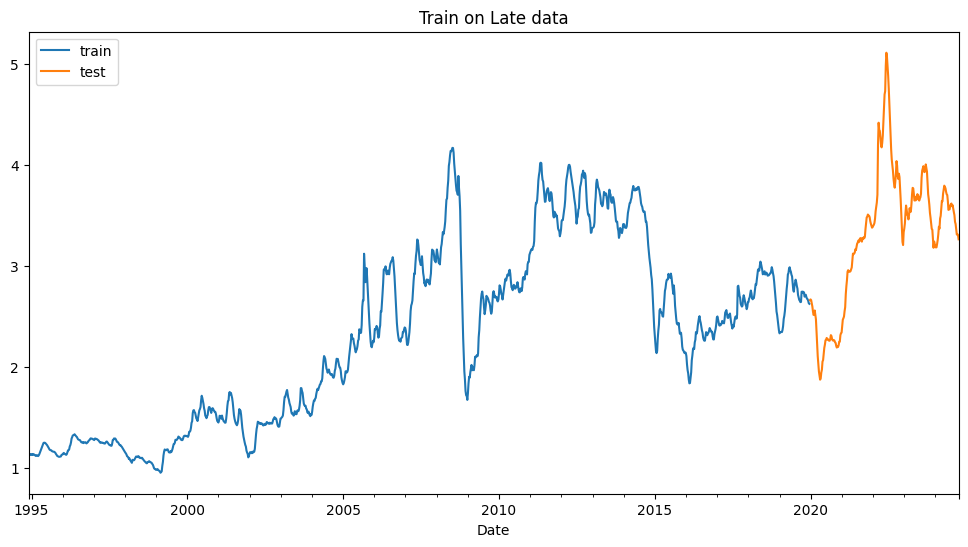

In [72]:

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
steps = 250
data_train_E = newGas[:-steps]   
data_test_E  = newGas[-steps:]
print(
    f"Train dates : {data_train_E.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test_E.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)

fig, ax = plt.subplots(figsize=(12, 6))
data_train_E['A1'].plot(ax=ax, label='train')
data_test_E['A1'].plot(ax=ax, label='test')
ax.set_title('Train on Late data')
ax.legend();

In [73]:
forecasterA1E = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=1),
                 lags = 6
             )
forecasterA1E.fit(y=data_train_E['A1'])

forecasterM1E = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=1),
                 lags = 6
             )
forecasterM1E.fit(y=data_train_E['M1'])

forecasterR1E = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=1),
                 lags = 6
             )
forecasterR1E.fit(y=data_train_E['R1'])

forecasterP1E = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=1),
                 lags = 6
             )
forecasterP1E.fit(y=data_train_E['P1'])

forecasterD1E = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=1),
                 lags = 6
             )
forecasterD1E.fit(y=data_train_E['D1'])




In [74]:
steps = 275 # Predicts 35 week into future 
predictionsA1E = forecasterA1E.predict(steps=steps)
predictionsA1E= predictionsA1E[245:275]

predictionsA1E



2024-09-09    2.88839
2024-09-16    2.88115
2024-09-23    2.87129
2024-09-30    2.86709
2024-10-07    2.86651
2024-10-14    2.86647
2024-10-21    2.86795
2024-10-28    2.87454
2024-11-04    2.89454
2024-11-11    2.88897
2024-11-18    2.87928
2024-11-25    2.88530
2024-12-02    2.88238
2024-12-09    2.87440
2024-12-16    2.86165
2024-12-23    2.86093
2024-12-30    2.85883
2025-01-06    2.85276
2025-01-13    2.85505
2025-01-20    2.86107
2025-01-27    2.87522
2025-02-03    2.89443
2025-02-10    2.89084
2025-02-17    2.87701
2025-02-24    2.88470
2025-03-03    2.88387
2025-03-10    2.87584
2025-03-17    2.86155
2025-03-24    2.86013
2025-03-31    2.85258
Freq: W-MON, Name: pred, dtype: float64

In [75]:
steps = 275 # Predicts 35 week into future 
predictionsM1E = forecasterM1E.predict(steps=steps)
predictionsM1E= predictionsM1E[245:275]

predictionsM1E

2024-09-09    3.00208
2024-09-16    3.01758
2024-09-23    2.99187
2024-09-30    2.98403
2024-10-07    3.01477
2024-10-14    3.00610
2024-10-21    2.98435
2024-10-28    2.97839
2024-11-04    3.01527
2024-11-11    3.00300
2024-11-18    2.98368
2024-11-25    2.98899
2024-12-02    3.02372
2024-12-09    3.00165
2024-12-16    2.98121
2024-12-23    3.00277
2024-12-30    3.01542
2025-01-06    2.99057
2025-01-13    2.97915
2025-01-20    3.00755
2025-01-27    3.00478
2025-02-03    2.98591
2025-02-10    2.98681
2025-02-17    3.01933
2025-02-24    3.00156
2025-03-03    2.98119
2025-03-10    3.00208
2025-03-17    3.01758
2025-03-24    2.99187
2025-03-31    2.98403
Freq: W-MON, Name: pred, dtype: float64

In [76]:
steps = 275 # Predicts 35 week into future 
predictionsR1E = forecasterR1E.predict(steps=steps)
predictionsR1E= predictionsR1E[245:275]

predictionsR1E

2024-09-09    2.58394
2024-09-16    2.57341
2024-09-23    2.56302
2024-09-30    2.55152
2024-10-07    2.55818
2024-10-14    2.59647
2024-10-21    2.63070
2024-10-28    2.64916
2024-11-04    2.64362
2024-11-11    2.62436
2024-11-18    2.61320
2024-11-25    2.60146
2024-12-02    2.58695
2024-12-09    2.58292
2024-12-16    2.58521
2024-12-23    2.59175
2024-12-30    2.60343
2025-01-06    2.61676
2025-01-13    2.60815
2025-01-20    2.59686
2025-01-27    2.58117
2025-02-03    2.56649
2025-02-10    2.54915
2025-02-17    2.54449
2025-02-24    2.58094
2025-03-03    2.62350
2025-03-10    2.64745
2025-03-17    2.63460
2025-03-24    2.61609
2025-03-31    2.59363
Freq: W-MON, Name: pred, dtype: float64

In [77]:
steps = 275 # Predicts 35 week into future 
predictionsP1E = forecasterP1E.predict(steps=steps)
predictionsP1E= predictionsP1E[245:275]

predictionsP1E

2024-09-09    3.23243
2024-09-16    3.21904
2024-09-23    3.22031
2024-09-30    3.24163
2024-10-07    3.24726
2024-10-14    3.24793
2024-10-21    3.23243
2024-10-28    3.21904
2024-11-04    3.22031
2024-11-11    3.24163
2024-11-18    3.24726
2024-11-25    3.24793
2024-12-02    3.23243
2024-12-09    3.21904
2024-12-16    3.22031
2024-12-23    3.24163
2024-12-30    3.24726
2025-01-06    3.24793
2025-01-13    3.23243
2025-01-20    3.21904
2025-01-27    3.22031
2025-02-03    3.24163
2025-02-10    3.24726
2025-02-17    3.24793
2025-02-24    3.23243
2025-03-03    3.21904
2025-03-10    3.22031
2025-03-17    3.24163
2025-03-24    3.24726
2025-03-31    3.24793
Freq: W-MON, Name: pred, dtype: float64

In [78]:
steps = 275 # Predicts 35 week into future 
predictionsD1E = forecasterD1E.predict(steps=steps)
predictionsD1E= predictionsD1E[245:275]

predictionsD1E.head()

2024-09-09    3.05891
2024-09-16    3.05906
2024-09-23    3.06036
2024-09-30    3.05883
2024-10-07    3.05777
Freq: W-MON, Name: pred, dtype: float64

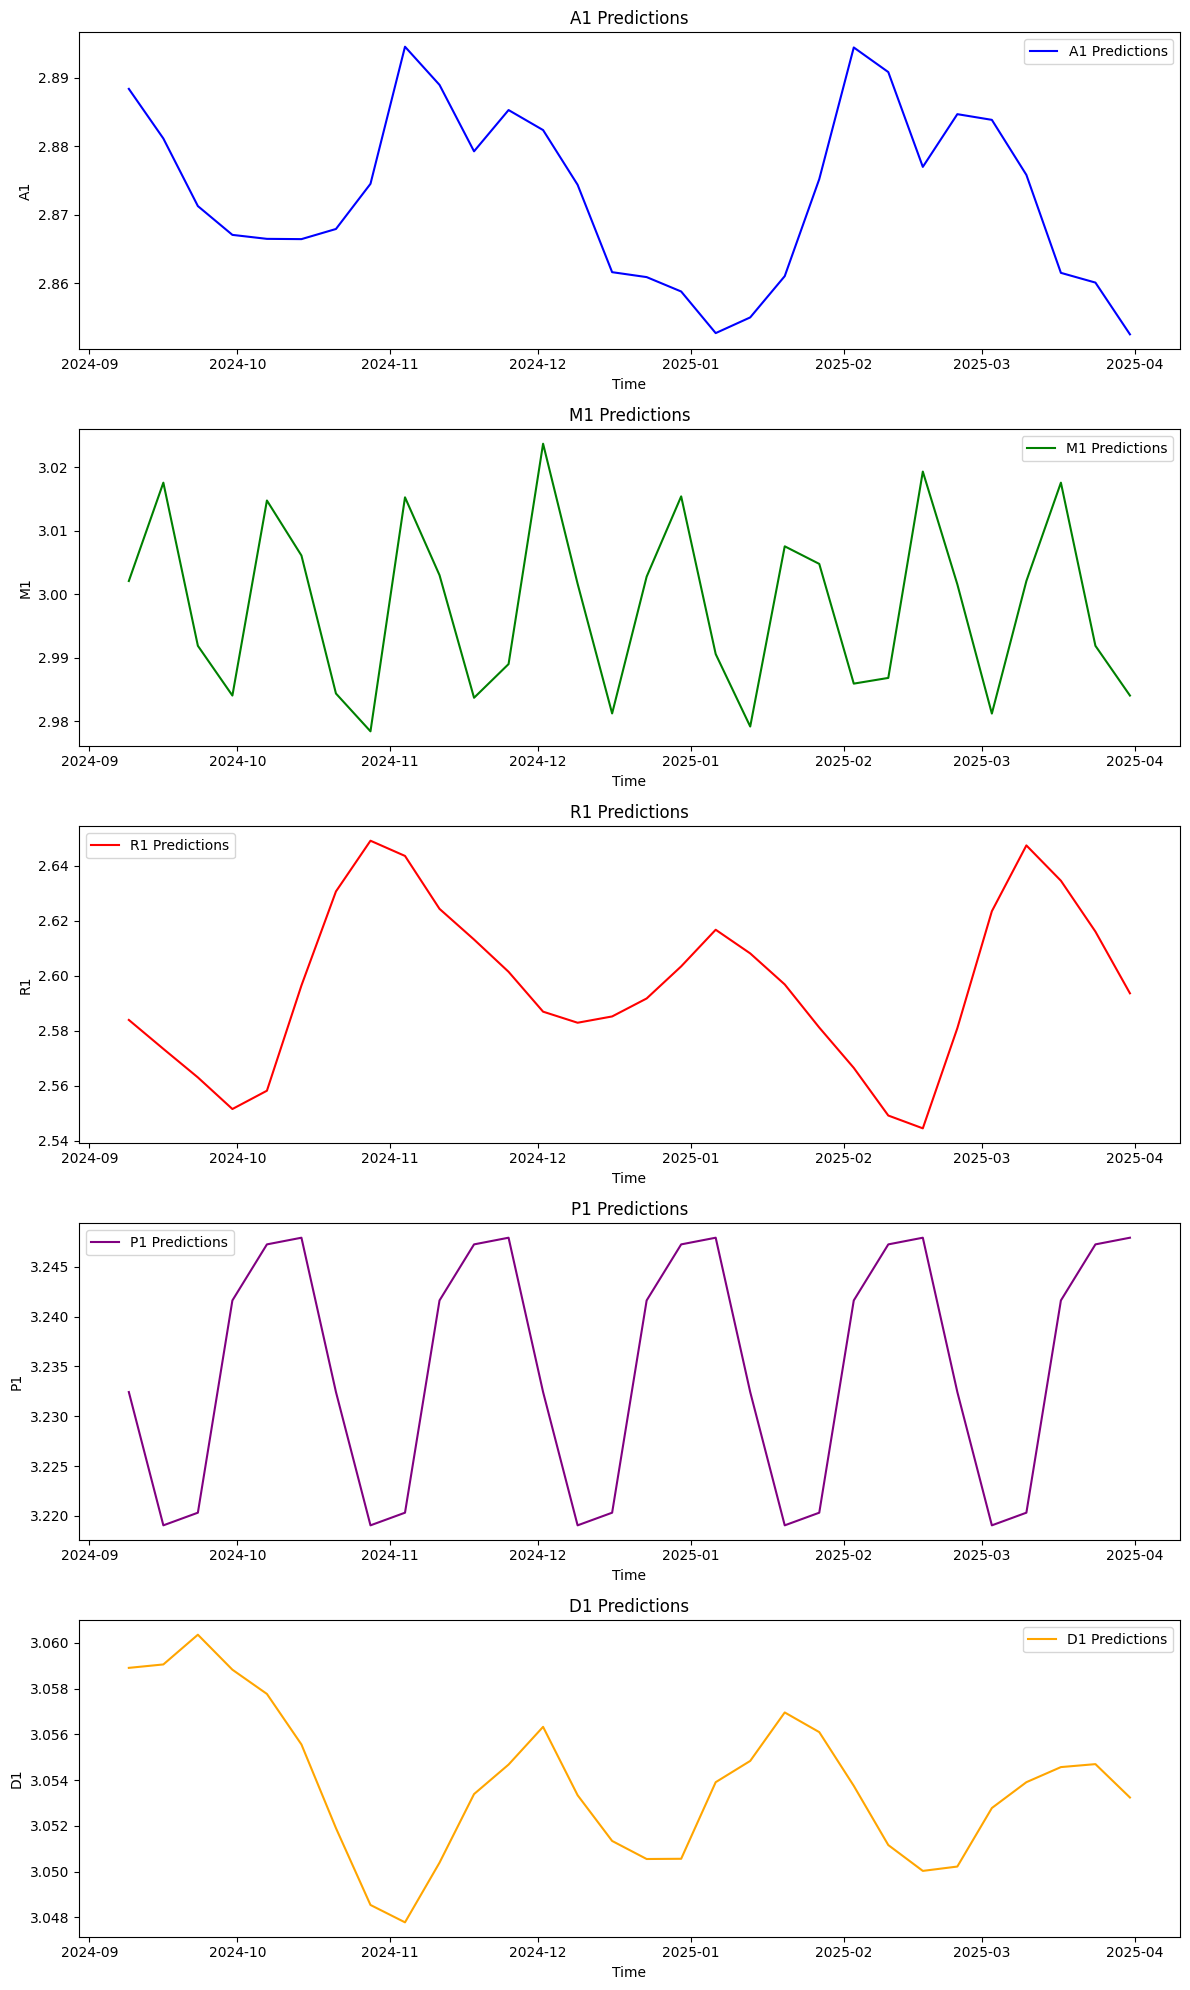

In [79]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 20))

# Plot predictionsA1E
axs[0].plot(predictionsA1E, label='A1 Predictions', color='blue')
axs[0].set_title('A1 Predictions')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('A1')
axs[0].legend()

# Plot predictionsM1E
axs[1].plot(predictionsM1E, label='M1 Predictions', color='green')
axs[1].set_title('M1 Predictions')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('M1')
axs[1].legend()

# Plot predictionsR1E
axs[2].plot(predictionsR1E, label='R1 Predictions', color='red')
axs[2].set_title('R1 Predictions')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('R1')
axs[2].legend()

# Plot predictionsP1E
axs[3].plot(predictionsP1E, label='P1 Predictions', color='purple')
axs[3].set_title('P1 Predictions')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('P1')
axs[3].legend()

# Plot predictionsD1E
axs[4].plot(predictionsD1E, label='D1 Predictions', color='orange')
axs[4].set_title('D1 Predictions')
axs[4].set_xlabel('Time')
axs[4].set_ylabel('D1')
axs[4].legend()

# Adjust layout
plt.tight_layout()
plt.show()